# Big Data Mart Sales Prediction

The big data mart sales prediction problem tends to predict the sales of the item per outlet.

The data contains 12 columns -

1.'Item_Identifier'

2.'Item_Weight'

3.'Item_Fat_Content'

4.'Item_Visibility'

5.'Item_Type'

6.'Item_MRP'

7.'Outlet_Identifier'

8.'Outlet_Establishment_Year'

9.'Outlet_Size'

10.'Outlet_Location_Type'

11.'Outlet_Type'

12.'Item_Outlet_Sales' - Target variable, continuous.

We will use regression models to predict our target.

In [1578]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1579]:
#Reading data into a variable using pandas

data = pd.read_csv('big_data_mart_train.csv')

In [1580]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [1581]:
#Checking data sample to analyse

data.sample(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2137,FDU49,19.500,Regular,0.030757,Canned,86.2540,OUT045,2002,NaN,Tier 2,Supermarket Type1,2163.8500
932,FDX50,20.100,Low Fat,0.074613,Dairy,108.7228,OUT035,2004,Small,Tier 2,Supermarket Type1,1215.7508
7609,FDT07,NaN,Regular,0.076945,Fruits and Vegetables,257.1330,OUT027,1985,Medium,Tier 3,Supermarket Type3,7433.6570
7573,NCY42,6.380,Low Fat,0.015186,Household,144.9470,OUT049,1999,Medium,Tier 1,Supermarket Type1,3435.5280
1321,NCY41,16.750,LF,0.075889,Health and Hygiene,37.6532,OUT045,2002,NaN,Tier 2,Supermarket Type1,575.2512
4282,NCU41,18.850,Low Fat,0.052012,Health and Hygiene,190.3846,OUT013,1987,High,Tier 3,Supermarket Type1,3630.6074
3387,NCO43,5.500,Low Fat,0.047290,Others,100.5016,OUT018,2009,Medium,Tier 3,Supermarket Type2,1416.8224
6509,FDS57,15.500,Low Fat,0.103442,Snack Foods,144.8470,OUT046,1997,Small,Tier 1,Supermarket Type1,2433.4990
7641,FDE40,NaN,Regular,0.173588,Dairy,60.0194,OUT019,1985,Small,Tier 1,Grocery Store,123.8388
2579,NCM41,16.500,Low Fat,0.035711,Health and Hygiene,93.6120,OUT049,1999,Medium,Tier 1,Supermarket Type1,1584.6040


In [1582]:
#Checking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [1583]:
#Checking data stats

data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [1584]:
#Print columns in the data

data.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [1585]:
#Categorizing data

data_categorical = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type',
       'Outlet_Type']

data_numerical = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']

In [1586]:
#Checking for null values in the dataset

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

17% data missing in Item_Weight

28% data missing in Outlet_Size

# Exploratory data analysis

In [1587]:
#Trying to check the data in Identifier column

a = data['Item_Identifier'].unique()

In [1588]:
a

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [1589]:
#Printing different types of values for identifier column

data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDQ40     9
NCJ30     9
NCB18     9
         ..
DRF48     1
FDC23     1
FDN52     1
FDT35     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64

Seems like Item_Identifier is helping recognize the Item_Type

In [1590]:
data[data['Item_Identifier']=='DRF48']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2797,DRF48,5.73,Low Fat,0.051907,Soft Drinks,188.1898,OUT045,2002,NaN,Tier 2,Supermarket Type1,1496.7184


In [1591]:
data[data['Item_Type']=='Meat']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
41,FDK43,9.800,Low Fat,0.026818,Meat,126.0020,OUT013,1987,High,Tier 3,Supermarket Type1,2150.5340
61,FDV27,7.970,Regular,0.040071,Meat,87.3514,OUT045,2002,NaN,Tier 2,Supermarket Type1,1062.6168
66,FDH19,19.350,Low Fat,0.033082,Meat,172.5738,OUT035,2004,Small,Tier 2,Supermarket Type1,4865.6664
89,FDN27,20.850,Low Fat,0.039624,Meat,117.2808,OUT049,1999,Medium,Tier 1,Supermarket Type1,1523.3504
...,...,...,...,...,...,...,...,...,...,...,...,...
8443,FDX15,17.200,LF,0.156542,Meat,162.4578,OUT049,1999,Medium,Tier 1,Supermarket Type1,2888.2404
8460,FDN39,19.350,Regular,0.065508,Meat,168.9816,OUT035,2004,Small,Tier 2,Supermarket Type1,2852.2872
8470,FDW27,5.860,Regular,0.151088,Meat,155.1314,OUT049,1999,Medium,Tier 1,Supermarket Type1,1551.3140
8491,FDO03,10.395,Regular,0.037033,Meat,227.9352,OUT018,2009,Medium,Tier 3,Supermarket Type2,4809.7392


In [1592]:
data[data['Item_Type']=='Others']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
139,NCN07,18.50,Low Fat,0.056816,Others,132.1284,OUT010,1998,NaN,Tier 3,Grocery Store,263.6568
142,NCO55,12.80,Low Fat,0.091222,Others,105.5938,OUT045,2002,NaN,Tier 2,Supermarket Type1,2143.8760
170,NCM43,14.50,Low Fat,0.019472,Others,164.8210,OUT035,2004,Small,Tier 2,Supermarket Type1,2120.5730
197,NCN55,14.60,Low Fat,0.059583,Others,238.8538,OUT049,1999,Medium,Tier 1,Supermarket Type1,6008.8450
225,NCO07,NaN,Low Fat,0.017117,Others,211.9560,OUT019,1985,Small,Tier 1,Grocery Store,213.0560
...,...,...,...,...,...,...,...,...,...,...,...,...
8340,NCL31,7.39,LF,0.120468,Others,145.1470,OUT049,1999,Medium,Tier 1,Supermarket Type1,5296.4390
8368,NCM19,12.65,Low Fat,0.047333,Others,113.8202,OUT045,2002,NaN,Tier 2,Supermarket Type1,1800.3232
8377,NCK07,10.65,Low Fat,0.048885,Others,166.1526,OUT018,2009,Medium,Tier 3,Supermarket Type2,1973.4312
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120


In [1593]:
data[data['Item_Type']=='Meat']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
41,FDK43,9.800,Low Fat,0.026818,Meat,126.0020,OUT013,1987,High,Tier 3,Supermarket Type1,2150.5340
61,FDV27,7.970,Regular,0.040071,Meat,87.3514,OUT045,2002,NaN,Tier 2,Supermarket Type1,1062.6168
66,FDH19,19.350,Low Fat,0.033082,Meat,172.5738,OUT035,2004,Small,Tier 2,Supermarket Type1,4865.6664
89,FDN27,20.850,Low Fat,0.039624,Meat,117.2808,OUT049,1999,Medium,Tier 1,Supermarket Type1,1523.3504
...,...,...,...,...,...,...,...,...,...,...,...,...
8443,FDX15,17.200,LF,0.156542,Meat,162.4578,OUT049,1999,Medium,Tier 1,Supermarket Type1,2888.2404
8460,FDN39,19.350,Regular,0.065508,Meat,168.9816,OUT035,2004,Small,Tier 2,Supermarket Type1,2852.2872
8470,FDW27,5.860,Regular,0.151088,Meat,155.1314,OUT049,1999,Medium,Tier 1,Supermarket Type1,1551.3140
8491,FDO03,10.395,Regular,0.037033,Meat,227.9352,OUT018,2009,Medium,Tier 3,Supermarket Type2,4809.7392


In [1594]:
data[data['Item_Type']=='Breads']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
114,FDV11,9.100,Regular,0.000000,Breads,173.2054,OUT045,2002,NaN,Tier 2,Supermarket Type1,3151.8972
124,FDW11,12.600,Low Fat,0.049058,Breads,62.7194,OUT017,2007,NaN,Tier 2,Supermarket Type1,866.8716
169,FDW11,12.600,Low Fat,0.048981,Breads,61.9194,OUT018,2009,Medium,Tier 3,Supermarket Type2,619.1940
175,FDR47,17.850,LF,0.000000,Breads,196.5794,OUT010,1998,NaN,Tier 3,Grocery Store,585.2382
...,...,...,...,...,...,...,...,...,...,...,...,...
8198,FDR59,NaN,Regular,0.063554,Breads,263.6594,OUT027,1985,Medium,Tier 3,Supermarket Type3,3401.5722
8240,FDQ47,7.155,Regular,0.168155,Breads,33.7874,OUT035,2004,Small,Tier 2,Supermarket Type1,882.1850
8334,FDW59,13.150,Low Fat,0.020699,Breads,86.3566,OUT013,1987,High,Tier 3,Supermarket Type1,1099.2358
8370,FDV23,11.000,Low Fat,0.105817,Breads,126.0046,OUT035,2004,Small,Tier 2,Supermarket Type1,871.5322


In [1595]:
data[data['Item_Identifier']=='FDG33']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
231,FDG33,NaN,Regular,0.139561,Seafood,170.4764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3435.5280
1202,FDG33,5.365,Regular,0.140525,Seafood,172.7764,OUT045,2002,NaN,Tier 2,Supermarket Type1,2233.0932
1575,FDG33,NaN,Regular,0.245543,Seafood,172.2764,OUT019,1985,Small,Tier 1,Grocery Store,171.7764
2728,FDG33,5.365,Regular,0.234733,Seafood,173.4764,OUT010,1998,NaN,Tier 3,Grocery Store,171.7764
4747,FDG33,5.365,Regular,0.140458,Seafood,169.7764,OUT049,1999,Medium,Tier 1,Supermarket Type1,3263.7516
5164,FDG33,5.365,Regular,0.140240,Seafood,171.0764,OUT046,1997,Small,Tier 1,Supermarket Type1,3263.7516
6112,FDG33,5.365,Regular,0.141034,Seafood,173.6764,OUT017,2007,NaN,Tier 2,Supermarket Type1,858.8820
7011,FDG33,5.365,Regular,0.140812,Seafood,173.5764,OUT018,2009,Medium,Tier 3,Supermarket Type2,2061.3168
7098,FDG33,5.365,Regular,0.140124,Seafood,172.0764,OUT013,1987,High,Tier 3,Supermarket Type1,2748.4224
7726,FDG33,5.365,Regular,0.140214,Seafood,173.7764,OUT035,2004,Small,Tier 2,Supermarket Type1,4637.9628


1559 different type of values in Item_Identifier column.

But majorly categorized using first 2 initials, which are FD for food items, DR for Drinks and NC for rest of the items.

We can make 3 different categories for this column.

In [1596]:
#Changing identifier to 3 major categories, first 2 initials of identifier column

data['Item_Identifier'] = data['Item_Identifier'].str[0:2]

In [1597]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FD,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NC,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FD,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

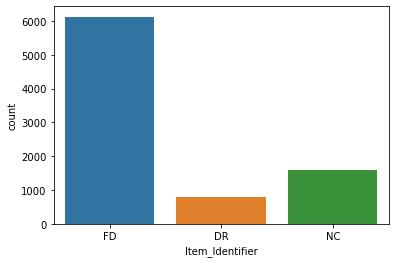

In [1598]:
#Analysing the Item_Identifier column

sns.countplot(data['Item_Identifier'])
data['Item_Identifier'].value_counts()

Item identifier now has 3 categories, FD, DR and NC.

Majority of the items belong to food category - 6125.
DR is 799 in count and NC is 1599 in count.

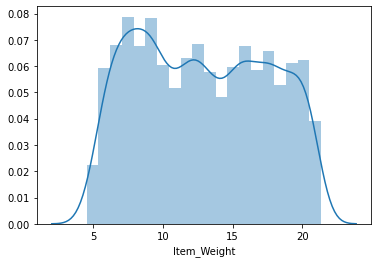

In [1599]:
#Analysing the Item_Weight column

sns.distplot(data['Item_Weight'])

Weight is between 4.5 - 23.

Items are almost equally distributed among different weight bins as can be seen in the graph.
The data seems to be normally distributed.

Checking skewness to confirm the above.

In [1600]:
data['Item_Weight'].skew()

0.0824262091221237

Data is normally distributed in weight column. We have 1463 null values in the column as we already know.



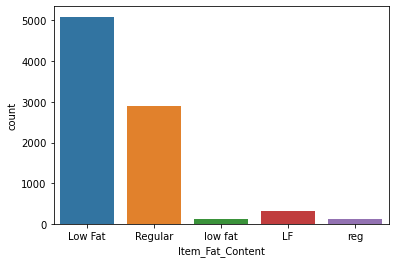

In [1601]:
#Analysing the Item_Fat_Content column

sns.countplot(x = data['Item_Fat_Content'])
plt.show()

The values in this column are similar but are categorized differently due to abberivations and capitalization of letters.

There are 2 categories as we can see, Low Fat and Regular.
We will combine these abberivations.

In [1602]:
data['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)

In [1603]:
data['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)

In [1604]:
data['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)

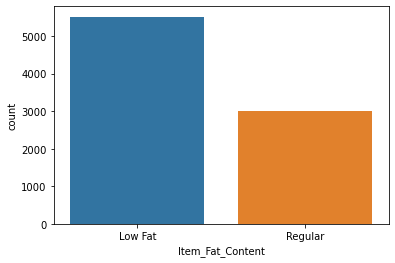

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [1605]:
#Checking the modified Item_Fat_Content column

sns.countplot(x = data['Item_Fat_Content'])
plt.show()
data['Item_Fat_Content'].value_counts()

Two categories are identified for Fat Content column, Low fat items are more in number 5517, and Regular fat are less 3006.


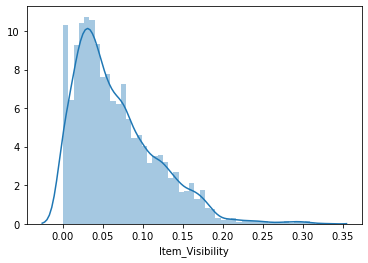

In [1606]:
#Analying the Item_Visibility column

sns.distplot(data['Item_Visibility'])

Item visibility for majority of the items is in range 0.00 - 0.18.

The data is right skewed as can be seen in the graph.

In [1607]:
#Analysing the Item_Type column

data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

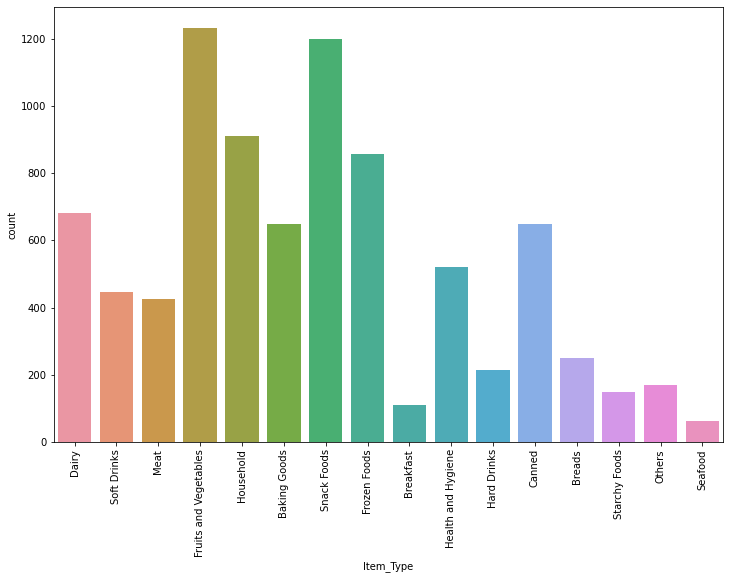

In [1608]:
plt.figure(figsize=(12,8))
sns.countplot(data['Item_Type'], )
plt.xticks(rotation = 90)

There are 16 different categories in 'Item type' column, and 'Fruits and Vegetables' and 'Snack Foods' are the highest in numbers.

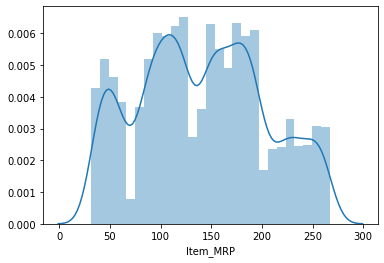

In [1609]:
#Analysing the Item_MRP column

sns.distplot(data['Item_MRP'])

In [1610]:
data['Item_MRP'].skew()

0.1272022683110526

The data is normally distributed in the MRP column, and data ranges between 30 - 270.

In [1611]:
#Analysing the Outlet_Identifier column

data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

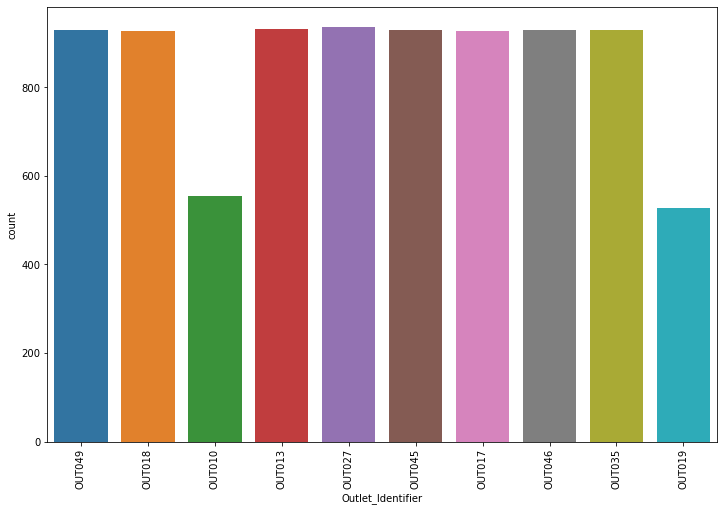

In [1612]:
plt.figure(figsize=(12,8))
sns.countplot(data['Outlet_Identifier'], )
plt.xticks(rotation = 90)

There are 10 different outlet identifiers, and count of samples having each of the value is ~930.

Only two outlet identifiers have numbers around 500.

The number are

OUT027  -  935

OUT013  -  932

OUT046  -  930

OUT049  -  930

OUT035  -  930

OUT045  -  929

OUT018  -  928

OUT017  -  926

OUT010  -  555

OUT019  -  528

In [1613]:
#Analysing the Outlet_Establishment year column

data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

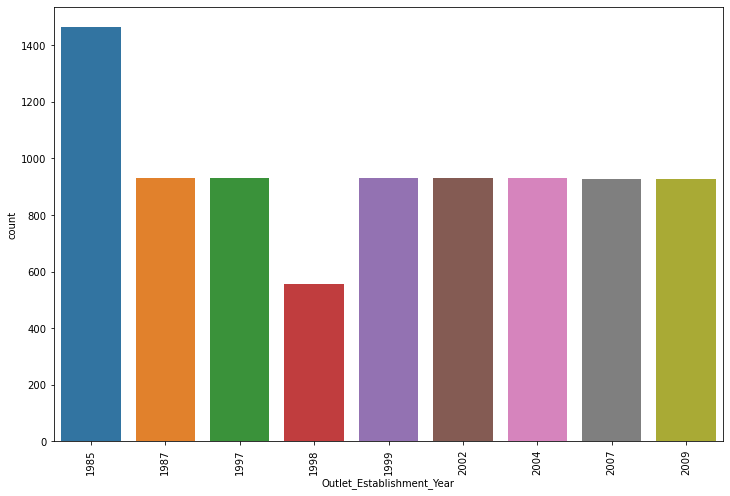

In [1614]:
plt.figure(figsize=(12,8))
sns.countplot(data['Outlet_Establishment_Year'] )
plt.xticks(rotation = 90)

There are 9 different outlet establishment years, and count of samples is ~930 in 7 out of 9 years.
Only year 1985 has 1463 count and 1998 has 555 count.


Its strange that the count of missing values in the Item Weight and number of rows having establishment year as 1985 is same (1463).

Lets confirm this point.

In [1615]:
data[data['Outlet_Establishment_Year']==1985].sample(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6411,NC,NaN,Low Fat,0.032100,Health and Hygiene,164.1526,OUT027,1985,Medium,Tier 3,Supermarket Type3,2960.1468
4570,NC,NaN,Low Fat,0.034141,Household,211.9218,OUT027,1985,Medium,Tier 3,Supermarket Type3,3419.5488
1524,NC,NaN,Low Fat,0.063800,Health and Hygiene,123.0414,OUT027,1985,Medium,Tier 3,Supermarket Type3,4629.9732
7478,DR,NaN,Low Fat,0.000000,Soft Drinks,261.2910,OUT019,1985,Small,Tier 1,Grocery Store,788.9730
1989,DR,NaN,Low Fat,0.038737,Soft Drinks,37.3190,OUT027,1985,Medium,Tier 3,Supermarket Type3,1281.6650
4031,FD,NaN,Regular,0.014999,Meat,72.4038,OUT019,1985,Small,Tier 1,Grocery Store,221.7114
2928,FD,NaN,Low Fat,0.000000,Frozen Foods,100.7042,OUT027,1985,Medium,Tier 3,Supermarket Type3,3174.5344
2242,FD,NaN,Low Fat,0.039631,Frozen Foods,31.9558,OUT027,1985,Medium,Tier 3,Supermarket Type3,984.7182
208,FD,NaN,Regular,0.051644,Snack Foods,107.3622,OUT019,1985,Small,Tier 1,Grocery Store,317.5866
4192,FD,NaN,Regular,0.200426,Baking Goods,88.8514,OUT019,1985,Small,Tier 1,Grocery Store,265.6542


We identify that items in outlet store established in 1985 do not have Item Weights in our data. 

In [1616]:
df_1985 = data[data['Outlet_Establishment_Year']==1985]

In [1617]:
df_1985['Outlet_Identifier'].value_counts()

OUT027    935
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [1618]:
df_1985['Item_Type'].value_counts()

Fruits and Vegetables    213
Snack Foods              212
Household                151
Frozen Foods             138
Dairy                    116
Baking Goods             112
Canned                   110
Health and Hygiene        90
Meat                      88
Soft Drinks               71
Breads                    47
Others                    32
Hard Drinks               31
Breakfast                 21
Starchy Foods             18
Seafood                   13
Name: Item_Type, dtype: int64

In [1619]:
df_1985[df_1985['Item_Type'] == 'Fruits and Vegetables']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
36,FD,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
62,FD,NaN,Low Fat,0.012090,Fruits and Vegetables,38.2848,OUT027,1985,Medium,Tier 3,Supermarket Type3,484.7024
161,FD,NaN,Low Fat,0.077367,Fruits and Vegetables,97.0094,OUT027,1985,Medium,Tier 3,Supermarket Type3,1808.9786
186,FD,NaN,Regular,0.094154,Fruits and Vegetables,165.7526,OUT019,1985,Small,Tier 1,Grocery Store,657.8104
284,FD,NaN,Low Fat,0.193773,Fruits and Vegetables,190.3846,OUT019,1985,Small,Tier 1,Grocery Store,573.2538
...,...,...,...,...,...,...,...,...,...,...,...,...
8373,FD,NaN,Low Fat,0.042758,Fruits and Vegetables,88.4172,OUT027,1985,Medium,Tier 3,Supermarket Type3,2051.9956
8405,FD,NaN,Low Fat,0.100493,Fruits and Vegetables,123.1046,OUT019,1985,Small,Tier 1,Grocery Store,124.5046
8422,FD,NaN,Low Fat,0.035183,Fruits and Vegetables,37.8506,OUT027,1985,Medium,Tier 3,Supermarket Type3,417.4566
8458,FD,NaN,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440


In [1620]:
data.loc[data['Outlet_Identifier'] == 'OUT019']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FD,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FD,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
49,FD,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FD,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720
63,FD,NaN,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076
...,...,...,...,...,...,...,...,...,...,...,...,...
8454,NC,NaN,Low Fat,0.127234,Household,158.3920,OUT019,1985,Small,Tier 1,Grocery Store,159.7920
8458,FD,NaN,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440
8469,FD,NaN,Regular,0.019114,Snack Foods,182.1608,OUT019,1985,Small,Tier 1,Grocery Store,367.5216
8480,FD,NaN,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020


Outlet weights are missing for OUT019 and OUT027.

Outlet identifier, Outlet establishment year, outlet_type, outlet location_type and Outlet size are connected.

In [1621]:
#Analysing the Outlet_Location_Type column

data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

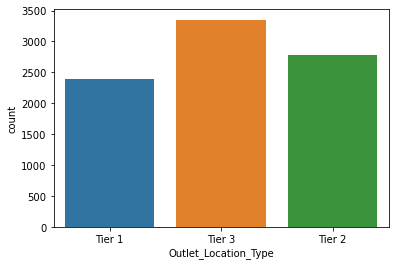

In [1622]:
sns.countplot(data['Outlet_Location_Type'] )

There are 3 types of outlet_location_types, Tier 1, Tier 2 and Tier 3

Count for these location are -

1. Tier 1 = 2388
2. Tier 2 = 2785
3. Tier 3 = 3350

In [1623]:
#Analysing the Outlet_Size column

data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

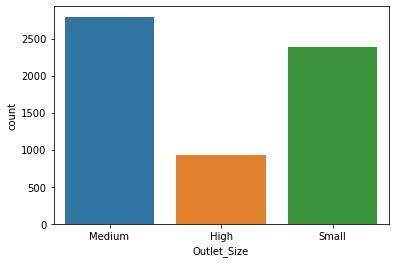

In [1624]:
sns.countplot(data['Outlet_Size'] )

Outlet sizes are of 3 types -

1. Medium - 2793 in count
2. Small - 2388 in count
3. High - 932 in count


In [1625]:
#Analysing the outlet type column

data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

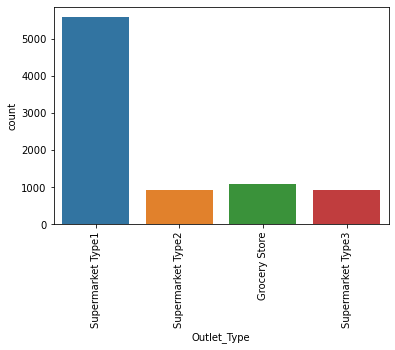

In [1626]:
sns.countplot(data['Outlet_Type'])
plt.xticks(rotation = 90)

Majority of the data have Outlet type as Supermarket Type1, and rest of the counts are around 1000 and are less in number.

Supermarket Type1  -  5577

Grocery Store   -     1083

Supermarket Type3  -   935

Supermarket Type2  -   928

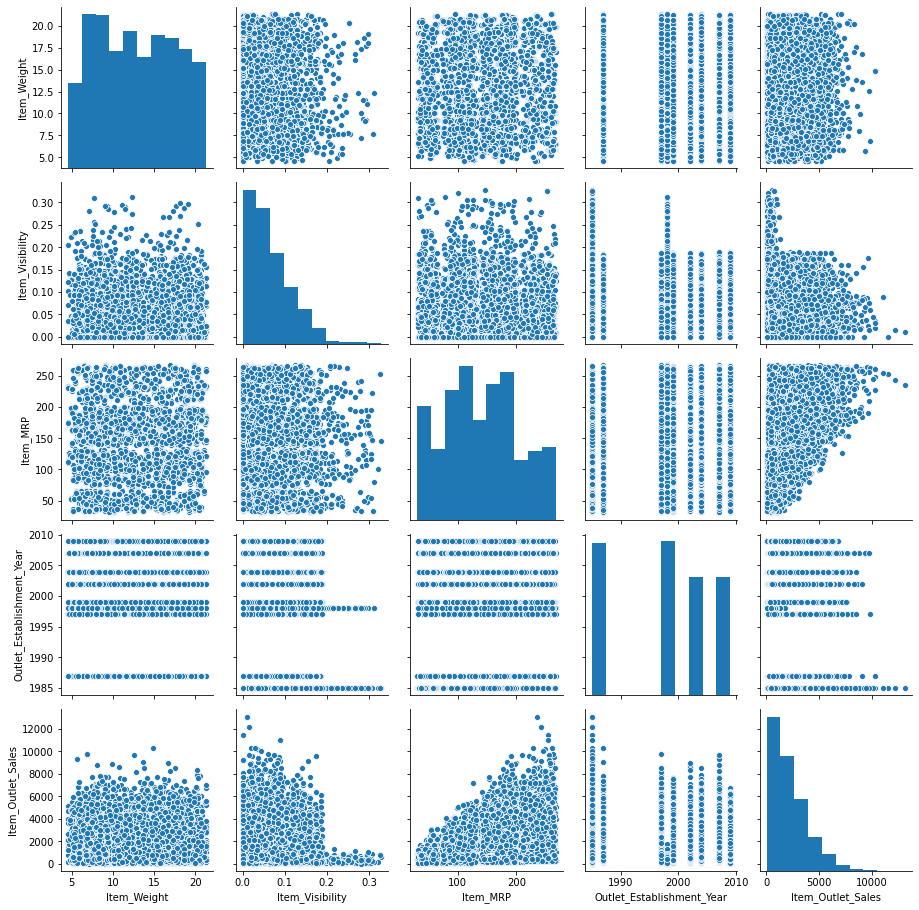

In [1627]:
#Creating a pairplot to check data relationship

sns.pairplot(data)

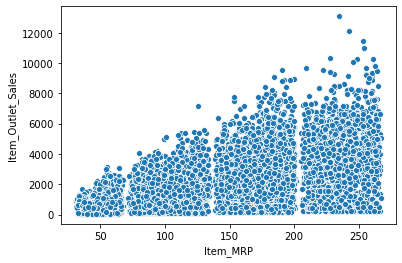

In [1628]:
#Checking relationship between MRP and Sales column

sns.scatterplot(x = data['Item_MRP'], y = data['Item_Outlet_Sales'])

With increasing MRP, outlet Sales are increasing

In [1629]:
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

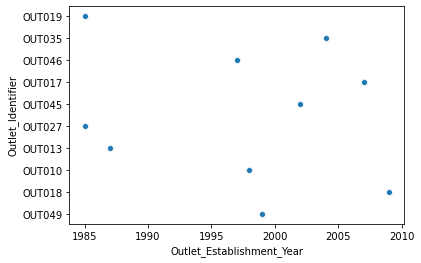

In [1630]:
#Checking relation between Outlet establishment year and outlet identifier column

sns.scatterplot(x= data['Outlet_Establishment_Year'], y= data['Outlet_Identifier'])

Outlets are categorized according to Establishment year. The identifiers are alloted to them as per their establishment year.
Only 1985 has 2 different identifiers for outlets.

Lets check sales of both these outlets.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

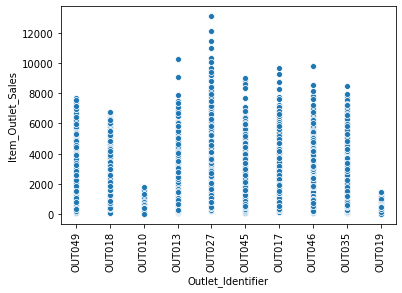

In [1631]:
#Checking relationship between outlet identifier and outlet sales column

sns.scatterplot(x = data['Outlet_Identifier'], y = data['Item_Outlet_Sales'])
plt.xticks(rotation = 90)

OUT027 has the highest sales, and OUT019 has the lowest sales, though they belong to the same establishment year.

# Treating the missing values

In [1632]:
#Treating the Item_Weight column

In [1633]:
for i in data['Item_Type'].unique():
    print(i, data[data['Item_Type']==i]['Item_Weight'].mean())

Dairy 13.42606890459367
Soft Drinks 11.847459893048129
Meat 12.81734421364986
Fruits and Vegetables 13.224769381746881
Household 13.384736495388726
Baking Goods 12.277108208955255
Snack Foods 12.987879554655919
Frozen Foods 12.867061281337076
Breakfast 12.768202247191002
Health and Hygiene 13.142313953488392
Hard Drinks 11.400327868852452
Canned 12.305705009276451
Breads 11.3469362745098
Starchy Foods 13.690730769230765
Others 13.853284671532842
Seafood 12.5528431372549


We will replace the Item weight by mean weight of category as the weights on category level are almost near to the generic mean of the data.

We will replace the nan values in our data by mean of Item_weights.

In [1634]:
data['Item_Weight'].replace(np.NaN,data['Item_Weight'].mean(), inplace = True)

In [1635]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [1636]:
#Treating the Outlet_Size column

#Lets try to find the relationship of size column with any other column which can help us decide how to fill the column
#Checking relationship with Outlet_Location_Type

In [1637]:
data[data['Outlet_Location_Type']=='Tier 1']['Outlet_Size'].unique()

array(['Medium', 'Small'], dtype=object)

In [1638]:
data[data['Outlet_Location_Type']=='Tier 2']['Outlet_Size'].unique()

array([nan, 'Small'], dtype=object)

In [1639]:
data[data['Outlet_Location_Type']=='Tier 3']['Outlet_Size'].unique()

array(['Medium', nan, 'High'], dtype=object)

In [1640]:
data[data['Outlet_Location_Type']=='Tier 1']['Outlet_Size'].isnull().sum()

0

In [1641]:
data[data['Outlet_Location_Type']=='Tier 2']['Outlet_Size'].isnull().sum()

1855

In [1642]:
data[data['Outlet_Location_Type']=='Tier 3']['Outlet_Size'].isnull().sum()

555

In [1643]:
data[data['Outlet_Location_Type']=='Tier 1']['Outlet_Size'].value_counts()

Small     1458
Medium     930
Name: Outlet_Size, dtype: int64

In [1644]:
data[data['Outlet_Location_Type']=='Tier 2']['Outlet_Size'].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

In [1645]:
data[data['Outlet_Location_Type']=='Tier 3']['Outlet_Size'].value_counts()

Medium    1863
High       932
Name: Outlet_Size, dtype: int64

The Size of T1 location type is Medium and Small.
T1 has no missing values.


The size of T2 is Small and NaN. Missing values found = 1855


The size of T3 is Medium, NaN, High. 555 Missing values found.

In [1646]:
#Checking the outlet types in all tiers.

In [1647]:
data[data['Outlet_Location_Type']=='Tier 1']['Outlet_Type'].value_counts()

Supermarket Type1    1860
Grocery Store         528
Name: Outlet_Type, dtype: int64

In [1648]:
data[data['Outlet_Location_Type']=='Tier 2']['Outlet_Type'].value_counts()

Supermarket Type1    2785
Name: Outlet_Type, dtype: int64

In [1649]:
data[data['Outlet_Location_Type']=='Tier 3']['Outlet_Type'].value_counts()

Supermarket Type3    935
Supermarket Type1    932
Supermarket Type2    928
Grocery Store        555
Name: Outlet_Type, dtype: int64

T1 has Supermarket type 1 and grocery stores

T2 has only Supermarket type 1

T3 has Supermarket type 1,2,3 and grocery stores too.

In [1650]:
#Checking outlet identifiers to finds relationship

In [1651]:
data[data['Outlet_Location_Type']=='Tier 1']['Outlet_Identifier'].value_counts()

OUT046    930
OUT049    930
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [1652]:
data[data['Outlet_Location_Type']=='Tier 2']['Outlet_Identifier'].value_counts()

OUT035    930
OUT045    929
OUT017    926
Name: Outlet_Identifier, dtype: int64

In [1653]:
data[data['Outlet_Location_Type']=='Tier 3']['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT018    928
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [1654]:
data[data['Outlet_Location_Type']=='Tier 1']['Outlet_Type'].value_counts()

Supermarket Type1    1860
Grocery Store         528
Name: Outlet_Type, dtype: int64

Outlet OUT019 is a grocery store, and OUT046 and 049 are Supermarket type 1

In [1655]:
data[data['Outlet_Type']=='Supermarket Type1']['Outlet_Size'].value_counts()

Small     1860
High       932
Medium     930
Name: Outlet_Size, dtype: int64

In [1656]:
data[data['Outlet_Type']=='Supermarket Type1']['Outlet_Size'].isnull().sum()

1855

Supermarket type 1 has 1855 missing values in size column.

Tier 2 has 1855 missing values, indicating the common part of missing values in size column.

In [1657]:
data[data['Outlet_Type']=='Supermarket Type2']['Outlet_Size'].value_counts()

Medium    928
Name: Outlet_Size, dtype: int64

In [1658]:
data[data['Outlet_Type']=='Supermarket Type2']['Outlet_Size'].isnull().sum()

0

Supermarket Type 2 does not have any missing value in size column

In [1659]:
data[data['Outlet_Type']=='Supermarket Type3']['Outlet_Size'].value_counts()

Medium    935
Name: Outlet_Size, dtype: int64

In [1660]:
data[data['Outlet_Type']=='Supermarket Type3']['Outlet_Size'].isnull().sum()

0

Supermarket Type 3 does not have any missing value in size column

In [1661]:
data[data['Outlet_Type']=='Grocery Store']['Outlet_Size'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

In [1662]:
data[data['Outlet_Type']=='Grocery Store']['Outlet_Size'].isnull().sum()

555

Outlet type Grocery store has 555 missing outlet size values


Tier 3 has 555 missing values, indicating the common part

Tier 1 has no missing size values so lets focus on Tier 2 and 3.

In [1663]:
data[data['Outlet_Location_Type']=='Tier 2'][data['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FD,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FD,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NC,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
33,FD,17.85,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NC,19.60,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
...,...,...,...,...,...,...,...,...,...,...,...,...
8501,FD,5.34,Regular,0.005998,Snack Foods,100.4358,OUT017,2007,NaN,Tier 2,Supermarket Type1,1508.0370
8502,NC,8.42,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FD,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8514,FD,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [1664]:
data[data['Outlet_Location_Type']=='Tier 3'][data['Outlet_Type']=='Grocery Store']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FD,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FD,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FD,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FD,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FD,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NC,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
8432,FD,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
8473,DR,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8486,FD,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744


For grocery store, let us check if we have a specific outlet size in our data

In [1665]:
data[data['Outlet_Type']=='Grocery Store']['Outlet_Size'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

Grocery stores are all small in the complete data, replacing the missing values for Grocery store by 'Small'

In [1666]:
for i in data.index:
    if data['Outlet_Type'][i]=='Grocery Store' and data['Outlet_Size'].isnull()[i]:
        data['Outlet_Size'][i] = 'Small'

In [1667]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [1668]:
data['Outlet_Size'].unique()

array(['Medium', 'Small', 'High', nan], dtype=object)

In [1669]:
#Now we have 2 different approaches, assigning 'Small' to missing values since Outlet_Location_Type and Outlet_Type are common for all missing values, and the sizes available for this combination is 'Small'

#Or we can assign a different size to the missing values.

#We will be checking with our results and accuracy with both the approaches.

In [1670]:
#Creating a new dataframe

data_new = data.copy()

In [1671]:
data_new.fillna('Small', inplace = True)

In [1672]:
data_new.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [1673]:
data['Outlet_Size'].replace(np.NaN, 'Unknown', inplace = True)

In [1674]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [1675]:
data['Outlet_Size'].unique()

array(['Medium', 'Small', 'High', 'Unknown'], dtype=object)

We have now successfully removed all the null values from our data

# Checking for outliers

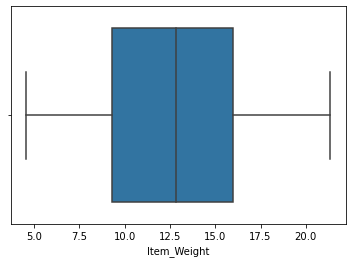

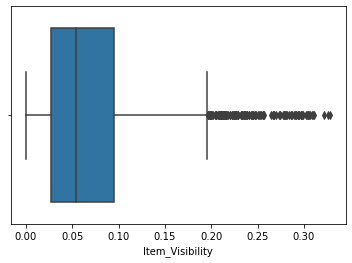

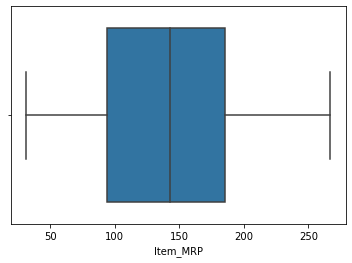

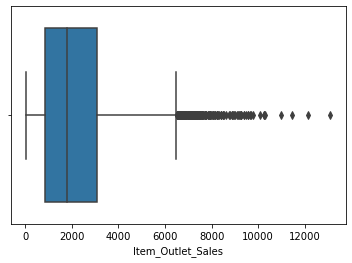

In [1676]:
#Creating boxplot of numerical data to check for outliers

for i in data_numerical:
    sns.boxplot(data[i])
    plt.show()

In [1677]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [1678]:
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

Item_Fat_Content               0
Item_Identifier                0
Item_MRP                       0
Item_Outlet_Sales            186
Item_Type                      0
Item_Visibility              144
Item_Weight                    0
Outlet_Establishment_Year      0
Outlet_Identifier              0
Outlet_Location_Type           0
Outlet_Size                    0
Outlet_Type                    0
dtype: int64

Though the outlier removal from visibility column would result in only 1% data loss, we would not drop these values instead treat skewness to check how our model performs.

# Skewness removal

In [1679]:
data.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [1680]:
#Using sqrt method, removing skewness from data

data['Item_Visibility'] = np.sqrt(data['Item_Visibility'])

In [1681]:
data.skew()

Item_Weight                  0.090561
Item_Visibility             -0.098056
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [1682]:
#Using sqrt method, removing skewness from data_new

data_new['Item_Visibility'] = np.sqrt(data_new['Item_Visibility'])

In [1683]:
data_new.skew()

Item_Weight                  0.090561
Item_Visibility             -0.098056
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

We have successfully treated the skewness in the data

# Encoding the required columns

In [1684]:
#Encoding values using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [1685]:
data['Item_Fat_Content']= le.fit_transform(data['Item_Fat_Content'])
data['Item_Identifier']= le.fit_transform(data['Item_Identifier'])
data['Outlet_Type']= le.fit_transform(data['Outlet_Type'])
data['Outlet_Identifier']= le.fit_transform(data['Outlet_Identifier'])
data['Outlet_Location_Type']= le.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Size']= le.fit_transform(data['Outlet_Size'])
data['Item_Type']= le.fit_transform(data['Item_Type'])

In [1686]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.300,0,0.126678,4,249.8092,9,1999,1,0,1,3735.1380
1,0,5.920,1,0.138846,14,48.2692,3,2009,1,2,2,443.4228
2,1,17.500,0,0.129461,10,141.6180,9,1999,1,0,1,2097.2700
3,1,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,2,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.238293,13,214.5218,1,1987,0,2,1,2778.3834
8519,1,8.380,1,0.216754,0,108.1570,7,2002,3,1,1,549.2850
8520,2,10.600,0,0.187580,8,85.1224,6,2004,2,1,1,1193.1136
8521,1,7.210,1,0.381078,13,103.1332,3,2009,1,2,2,1845.5976


The data is now encoded and ready to be sent to the machine learning model.

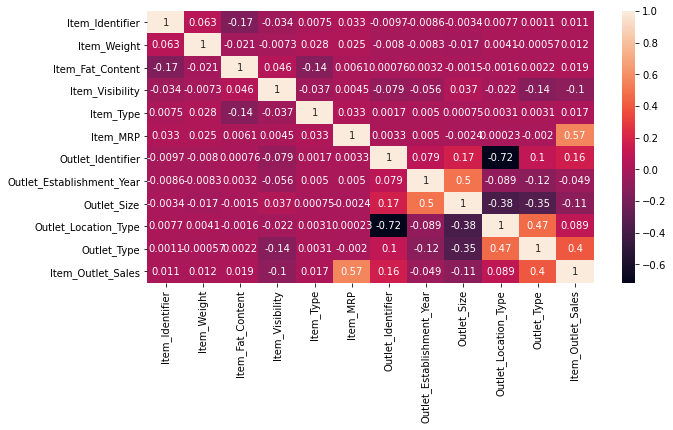

In [1687]:
#Plotting heatmap to observe correlation between data, doing it now since we required encoded values to check correlation

plt.figure(figsize = (10,5))
corr1 = data.corr()
sns.heatmap(corr1, annot = True)

The sales are majorly correlated with Outlet Type and Item MRP.

Rest of the columns are less correlated with sales

# ML classification using various models

In [1688]:
#Splitting the dependent and independent data

x = data.drop('Item_Outlet_Sales', axis =1)
y = data['Item_Outlet_Sales']

In [1689]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,9.300,0,0.126678,4,249.8092,9,1999,1,0,1
1,0,5.920,1,0.138846,14,48.2692,3,2009,1,2,2
2,1,17.500,0,0.129461,10,141.6180,9,1999,1,0,1
3,1,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,2,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.238293,13,214.5218,1,1987,0,2,1
8519,1,8.380,1,0.216754,0,108.1570,7,2002,3,1,1
8520,2,10.600,0,0.187580,8,85.1224,6,2004,2,1,1
8521,1,7.210,1,0.381078,13,103.1332,3,2009,1,2,2


In [1690]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [1691]:
#Importing necessary models

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [1692]:
#Splitting data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=42)

In [1693]:
x_train.shape, y_train.shape

((5966, 11), (5966,))

In [1694]:
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
lr = LinearRegression()

In [1695]:
for i in [dt, svr, knn, lr]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print(i)
    print('R2 score is ',r2_score(y_test, pred))
    print('R2 for train data', r2_score(y_train,i.predict(x_train)))
    print('Mean absolute error is ',mean_absolute_error(y_test, pred))
    print('Mean squared error is ', mean_squared_error(y_test, pred))
    print('------------------------------------------')

DecisionTreeRegressor()
R2 score is  0.1816763091775685
R2 for train data 1.0
Mean absolute error is  1039.8408157215486
Mean squared error is  2292119.36128015
------------------------------------------
SVR()
R2 score is  -0.03118281069756157
R2 for train data -0.0481510347060532
Mean absolute error is  1289.955965066829
Mean squared error is  2888336.3782902407
------------------------------------------
KNeighborsRegressor()
R2 score is  0.49467552817339633
R2 for train data 0.6596138051719933
Mean absolute error is  837.7085184669534
Mean squared error is  1415410.5748036518
------------------------------------------
LinearRegression()
R2 score is  0.5080052173663279
R2 for train data 0.4982153176211177
Mean absolute error is  876.5343850691663
Mean squared error is  1378074.201652511
------------------------------------------


# Ensemble methods

In [1696]:
#Importing Random Forest Classifier to check ensemble method performance

from sklearn.ensemble import RandomForestRegressor

In [1697]:
rfr = RandomForestRegressor()

In [1698]:
rfr.fit(x_train, y_train)
predict = rfr.predict(x_test)
print('R2 score is ',r2_score(y_test, pred))
print('R2 for train data', r2_score(y_train,rfr.predict(x_train)))
print('Mean absolute error is ',mean_absolute_error(y_test, pred))
print('Mean squared error is ', mean_squared_error(y_test, pred))

R2 score is  0.5080052173663279
R2 for train data 0.938219648729484
Mean absolute error is  876.5343850691663
Mean squared error is  1378074.201652511


The random forest regressor shows overfitting on train data

# Checking on data where we assigned 'Small' to missing Outlet size

In [1699]:
dt1 = DecisionTreeRegressor()
svr1 = SVR()
knn1 = KNeighborsRegressor()
lr1 = LinearRegression()

In [1700]:
data_new['Item_Fat_Content']= le.fit_transform(data_new['Item_Fat_Content'])
data_new['Item_Identifier']= le.fit_transform(data_new['Item_Identifier'])
data_new['Outlet_Type']= le.fit_transform(data_new['Outlet_Type'])
data_new['Outlet_Identifier']= le.fit_transform(data_new['Outlet_Identifier'])
data_new['Outlet_Location_Type']= le.fit_transform(data_new['Outlet_Location_Type'])
data_new['Outlet_Size']= le.fit_transform(data_new['Outlet_Size'])
data_new['Item_Type']= le.fit_transform(data_new['Item_Type'])

In [1701]:
x1 = data_new.drop('Item_Outlet_Sales', axis =1)
y1 = data_new['Item_Outlet_Sales']

In [1702]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size = 0.30, random_state=42)

In [1703]:
for i in [dt1, svr1, knn1, lr1]:
    i.fit(x_train1, y_train1)
    pred1 = i.predict(x_test1)
    print(i)
    print('R2 score is ',r2_score(y_test1, pred1))
    print('R2 for train data', r2_score(y_train1,i.predict(x_train1)))
    print('Mean absolute error is ',mean_absolute_error(y_test1, pred1))
    print('Mean squared error is ', mean_squared_error(y_test1, pred1))
    print('------------------------------------------')

DecisionTreeRegressor()
R2 score is  0.19582008314546462
R2 for train data 1.0
Mean absolute error is  1041.9488786077434
Mean squared error is  2252502.7419436094
------------------------------------------
SVR()
R2 score is  -0.031182959917694264
R2 for train data -0.04815119662290446
Mean absolute error is  1289.9560228651976
Mean squared error is  2888336.7962548663
------------------------------------------
KNeighborsRegressor()
R2 score is  0.49368285318598704
R2 for train data 0.659027533259553
Mean absolute error is  838.9127910520141
Mean squared error is  1418191.051018159
------------------------------------------
LinearRegression()
R2 score is  0.5067388434908111
R2 for train data 0.5006429642390449
Mean absolute error is  876.0259715715514
Mean squared error is  1381621.306681053
------------------------------------------


The results are approximately similar for data and data_new.

We will continue with original data only (Size = Unknown) since MAE is lesser in case size is set to Unknown.

# Cross validation

In [1704]:
#Importing cross val score from Model_selection

from sklearn.model_selection import cross_val_score

In [1705]:
for i in [dt, svr, knn, lr, rfr]:
    cv = cross_val_score(i, x, y, cv=5, scoring = 'r2')
    print(i, cv.mean())

DecisionTreeRegressor() 0.14655017523145827
SVR() -0.0477620823737094
KNeighborsRegressor() 0.4839551837516158
LinearRegression() 0.4995247266167344
RandomForestRegressor() 0.5502186457444033


Cross validation given a similar score, hence we see that our model is able to learn in a similar manner only.

# Regularization methods

Let us also try the regularization methods to check how our model performs, and it is able to avoid overfitting/underfitting and provide best results.

In [1706]:
#Importing models

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

ls = Lasso(alpha = 0.001)
rd = Ridge(alpha = 0.001)

In [1707]:
#Fitting the model

ls.fit(x_train, y_train)

Lasso(alpha=0.001)

In [1708]:
#Prediction

lasso_prediction = ls.predict(x_test)

In [1709]:
#Scoring

print('Test data',r2_score(y_test, lasso_prediction))
print('Test data',r2_score(y_train, ls.predict(x_train)))


Test data 0.5080057003225837
Test data 0.4982153175818992


In [1710]:
#Fitting in ridge

rd.fit(x_train, y_train)

Ridge(alpha=0.001)

In [1711]:
#Prediction

ridge_prediction = rd.predict(x_test)

In [1712]:
#Scoring

print('Test data',r2_score(y_test, ridge_prediction))
print('Test data',r2_score(y_train, rd.predict(x_train)))

Test data 0.5080052659575031
Test data 0.4982153176204781


In [1713]:
#Elastic net model

from sklearn.linear_model import ElasticNet

In [1714]:
el = ElasticNet(alpha = 0.0001)

In [1715]:
#Fitting the model

el.fit(x_train, y_train)

ElasticNet(alpha=0.0001)

In [1716]:
#Prediction and scoring

elasticnet_prediction = el.predict(x_test)
print('Test data',r2_score(y_test, elasticnet_prediction))
print('Test data',r2_score(y_train, el.predict(x_train)))

Test data 0.5080196078274726
Test data 0.4982152610471693


In [1717]:
#Cross validation of regularization models

for i in [ls, rd, el]:
    cv = cross_val_score(i, x, y, cv=5, scoring = 'r2')
    print(i, cv.mean())

Lasso(alpha=0.001) 0.4995247666029005
Ridge(alpha=0.001) 0.4995247298370492
ElasticNet(alpha=0.0001) 0.49952578256042024


From the above data, we see that we get similar results for all the regularization models as well. We tried changing alpha values to 0.00001, 0.000001 and 0.001 but the results are not majorly impacted.

So we will stick to Linear Regression model and try to hypertune the model.

# Hypertuning the LR model

We will now try to find the best parameters for the model using GridSearch CV

In [1718]:
from sklearn.model_selection import GridSearchCV

In [1719]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [1720]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}

gcv_lr = GridSearchCV(lr,parameters, cv=5)

In [1721]:
res = gcv_lr.fit(x_train,y_train)

In [1722]:
res.best_params_

{'fit_intercept': True, 'normalize': False}

In [1723]:
res.best_score_

0.49523492272877423

The output of grid search shows that the model performs the best with the default values, hence we will save the model according to default values only.

# Saving the best model

In [1724]:
import joblib

joblib.dump(lr, 'bigdata_mart.obj')

['bigdata_mart.obj']

# Conclusion

The data seems to have a huge amount of randomness as the model is able to learn quite less, the score of the model is around 50% and the mean absolute error is also quite high.

We have saved Linear Regression model in our case as the model does not show much over/underfitting.

We will now check the results on test file

We will need to perform following steps on test data -

1. Change Item identifier to the first two characters to find the item category.
2. Change the categories in Item_Fat_Content to Low Fat and Regular, since there are multiple abberivations for the two categories.
3. Replace missing values in Item_Weight column by mean of data.
4. Replace NaN values in Outlet_Size column to 'Small' where Outlet Tyie is Grocery Store and set rest of the missing values to unknown.
5. Remove skewness from Item Visibility column
6. Encode the string data 
7. Make the prediction
8. Add sales column to the test dataframe to increase readability

In [1725]:
#Importing test data

big_data_test = pd.read_csv('big_data_mart_test.csv')

In [1726]:
big_data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [1727]:
#Checking for null values

big_data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Modeling the test data

In [1728]:
#Changing Item_Fat_Content to 2 major categories

big_data_test['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)
big_data_test['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)
big_data_test['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)

In [1729]:
big_data_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [1730]:
#Making necessary changes in Item_Identifier column

big_data_test['Item_Identifier'] = big_data_test['Item_Identifier'].str[0:2]

In [1731]:
big_data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FD,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NC,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FD,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FD,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FD,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FD,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NC,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FD,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [1732]:
#Replacing missing values in Item_Weight column by mean of data

big_data_test['Item_Weight'].replace(np.NaN,big_data_test['Item_Weight'].mean(), inplace = True)

In [1733]:
big_data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [1734]:
#Replacing missing values where Outlet Type is Grocery Store by 'Small'

for i in big_data_test.index:
    if big_data_test['Outlet_Type'][i]=='Grocery Store' and big_data_test['Outlet_Size'].isnull()[i]:
        big_data_test['Outlet_Size'][i] = 'Small'

In [1735]:
big_data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1236
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [1736]:
#Replacing pending missing values by 'Unknown' category

big_data_test['Outlet_Size'].replace(np.NaN, 'Unknown', inplace = True)

In [1737]:
big_data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [1738]:
#Checking for skewness in data

big_data_test.skew()

Item_Weight                  0.142813
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

In [1739]:
#Skewness removal from Item_Visibility column

big_data_test['Item_Visibility'] = np.sqrt(big_data_test['Item_Visibility'])

In [1740]:
big_data_test.skew()

Item_Weight                  0.142813
Item_Visibility             -0.094941
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

In [1741]:
#Encoding the data by using Label Encoder

big_data_test['Item_Fat_Content']= le.fit_transform(big_data_test['Item_Fat_Content'])
big_data_test['Item_Identifier']= le.fit_transform(big_data_test['Item_Identifier'])
big_data_test['Outlet_Type']= le.fit_transform(big_data_test['Outlet_Type'])
big_data_test['Outlet_Identifier']= le.fit_transform(big_data_test['Outlet_Identifier'])
big_data_test['Outlet_Location_Type']= le.fit_transform(big_data_test['Outlet_Location_Type'])
big_data_test['Outlet_Size']= le.fit_transform(big_data_test['Outlet_Size'])
big_data_test['Item_Type']= le.fit_transform(big_data_test['Item_Type'])

The test data is now ready to be used

# Prediction on test data

In [1742]:
#Loading a model using joblib and making the prediction

model = joblib.load('bigdata_mart.obj')

test_prediction = model.predict(big_data_test)


In [1743]:
test_prediction

array([1853.33065011, 1098.10879469, 2352.59905083, ..., 1775.37319071,
       3261.76121612, 1196.62730586])

In [1744]:
#Creating a sales column with predicted values in test data

big_data_test['Item_Outlet_Sales'] = test_prediction

In [1745]:
#Final output

big_data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,20.750000,0,0.086976,13,107.8622,9,1999,1,0,1,1853.330650
1,1,8.300000,1,0.196030,4,87.3198,2,2007,3,1,1,1098.108795
2,2,14.600000,0,0.315555,11,241.7538,0,1998,2,2,0,2352.599051
3,1,7.315000,0,0.124050,13,155.0340,2,2007,3,1,1,2140.974217
4,1,12.695633,1,0.344383,4,234.2300,5,1985,1,2,3,5177.013790
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,10.500000,1,0.116174,13,141.3154,8,1997,2,0,1,2454.354259
5677,1,7.600000,1,0.378141,15,169.1448,3,2009,1,2,2,3034.706928
5678,2,10.000000,0,0.271162,8,118.7440,7,2002,3,1,1,1775.373191
5679,1,15.300000,1,0.000000,3,214.6218,2,2007,3,1,1,3261.761216


In [1746]:
#The task is done